# OCR and Image Processing Demo

This notebook demonstrates:
1. Converting PDF to image
2. Various image processing techniques
3. OCR with bounding boxes for text detection
4. Displaying results using pandas DataFrames

In [2]:
# Install required packages (uncomment if needed)
# !pip install pdf2image pytesseract opencv-python pandas pillow numpy matplotlib

In [3]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pdf2image import convert_from_path
from PIL import Image
import pytesseract
from pathlib import Path

## Step 1: Convert PDF to Image

Image shape: (2550, 3300, 3)
Number of pages in PDF: 9


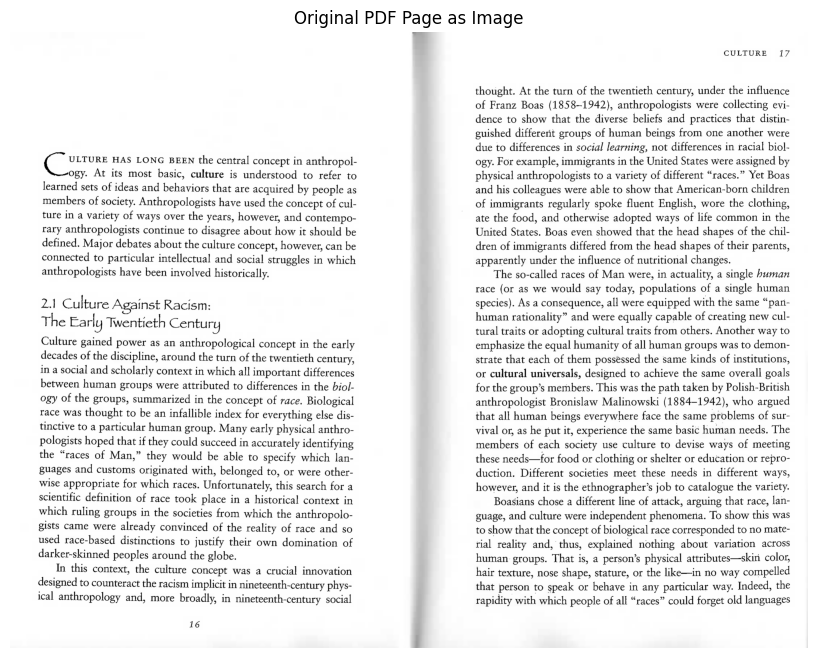

In [4]:
# Path to the PDF file
pdf_path = "../data/raw_pdfs/#3 Lavenda and Schultz 2007 Culture (1).pdf"

# Convert PDF to images (one image per page)
images = convert_from_path(pdf_path, dpi=300)

# Use the first page for this demo
original_image = images[1]

# Convert PIL image to numpy array for OpenCV
image_np = np.array(original_image)
image_cv = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)

print(f"Image shape: {image_np.shape}")
print(f"Number of pages in PDF: {len(images)}")

# Display original image
plt.figure(figsize=(12, 8))
plt.imshow(original_image)
plt.title("Original PDF Page as Image")
plt.axis('off')
plt.show()

## Step 2: Image Processing Techniques

Let's explore different ways to process and edit the image:

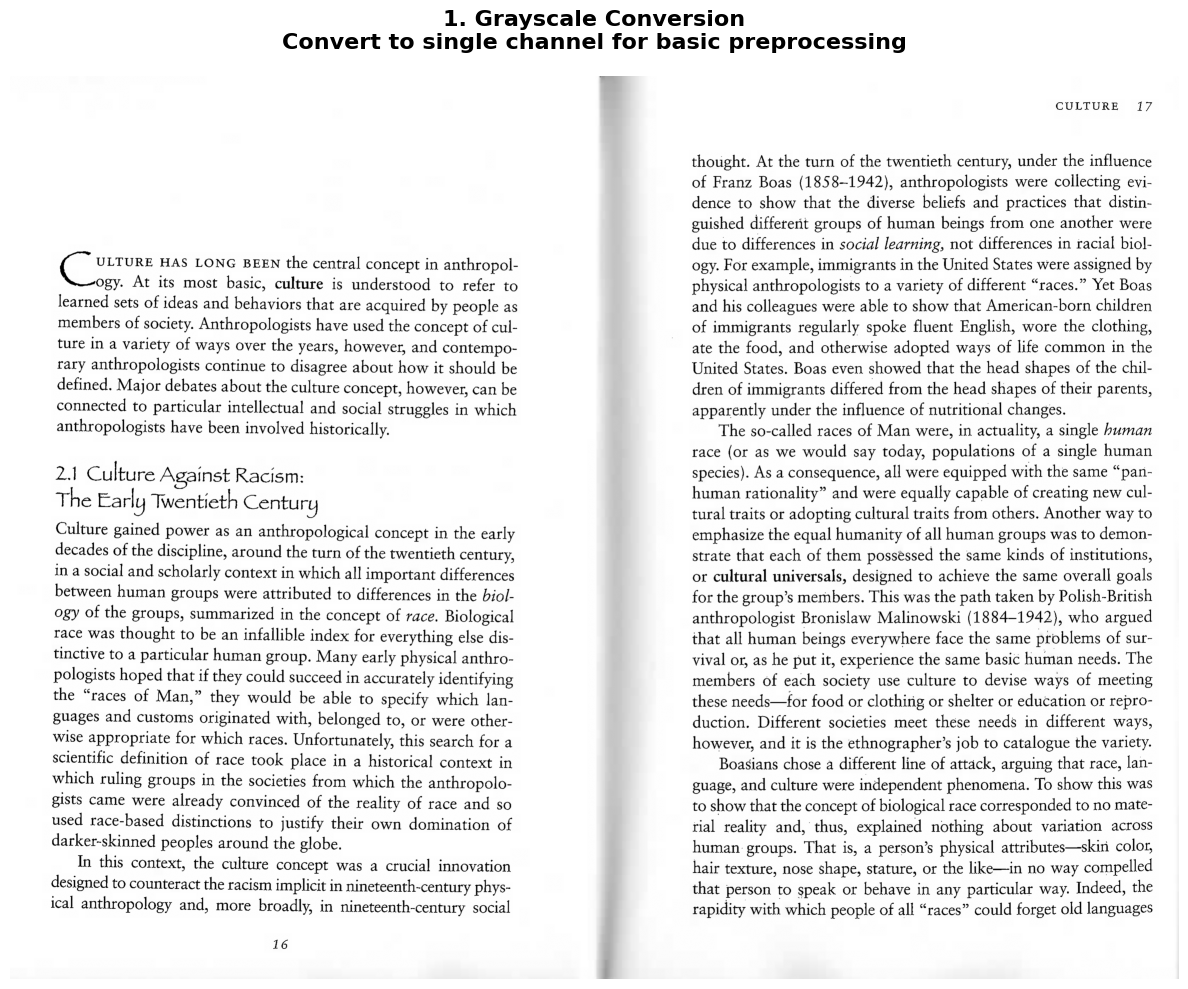

TECHNIQUE 1: GRAYSCALE
Description: Convert RGB image to single channel (grayscale)
Use Case: Basic preprocessing step for OCR
Benefits: Reduces complexity, faster processing



In [5]:
gray = cv2.cvtColor(image_cv, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(16, 10))
plt.imshow(gray, cmap='gray')
plt.title('1. Grayscale Conversion\nConvert to single channel for basic preprocessing', 
          fontsize=16, fontweight='bold', pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()

print("="*80)
print("TECHNIQUE 1: GRAYSCALE")
print("="*80)
print("Description: Convert RGB image to single channel (grayscale)")
print("Use Case: Basic preprocessing step for OCR")
print("Benefits: Reduces complexity, faster processing")
print("="*80 + "\n")

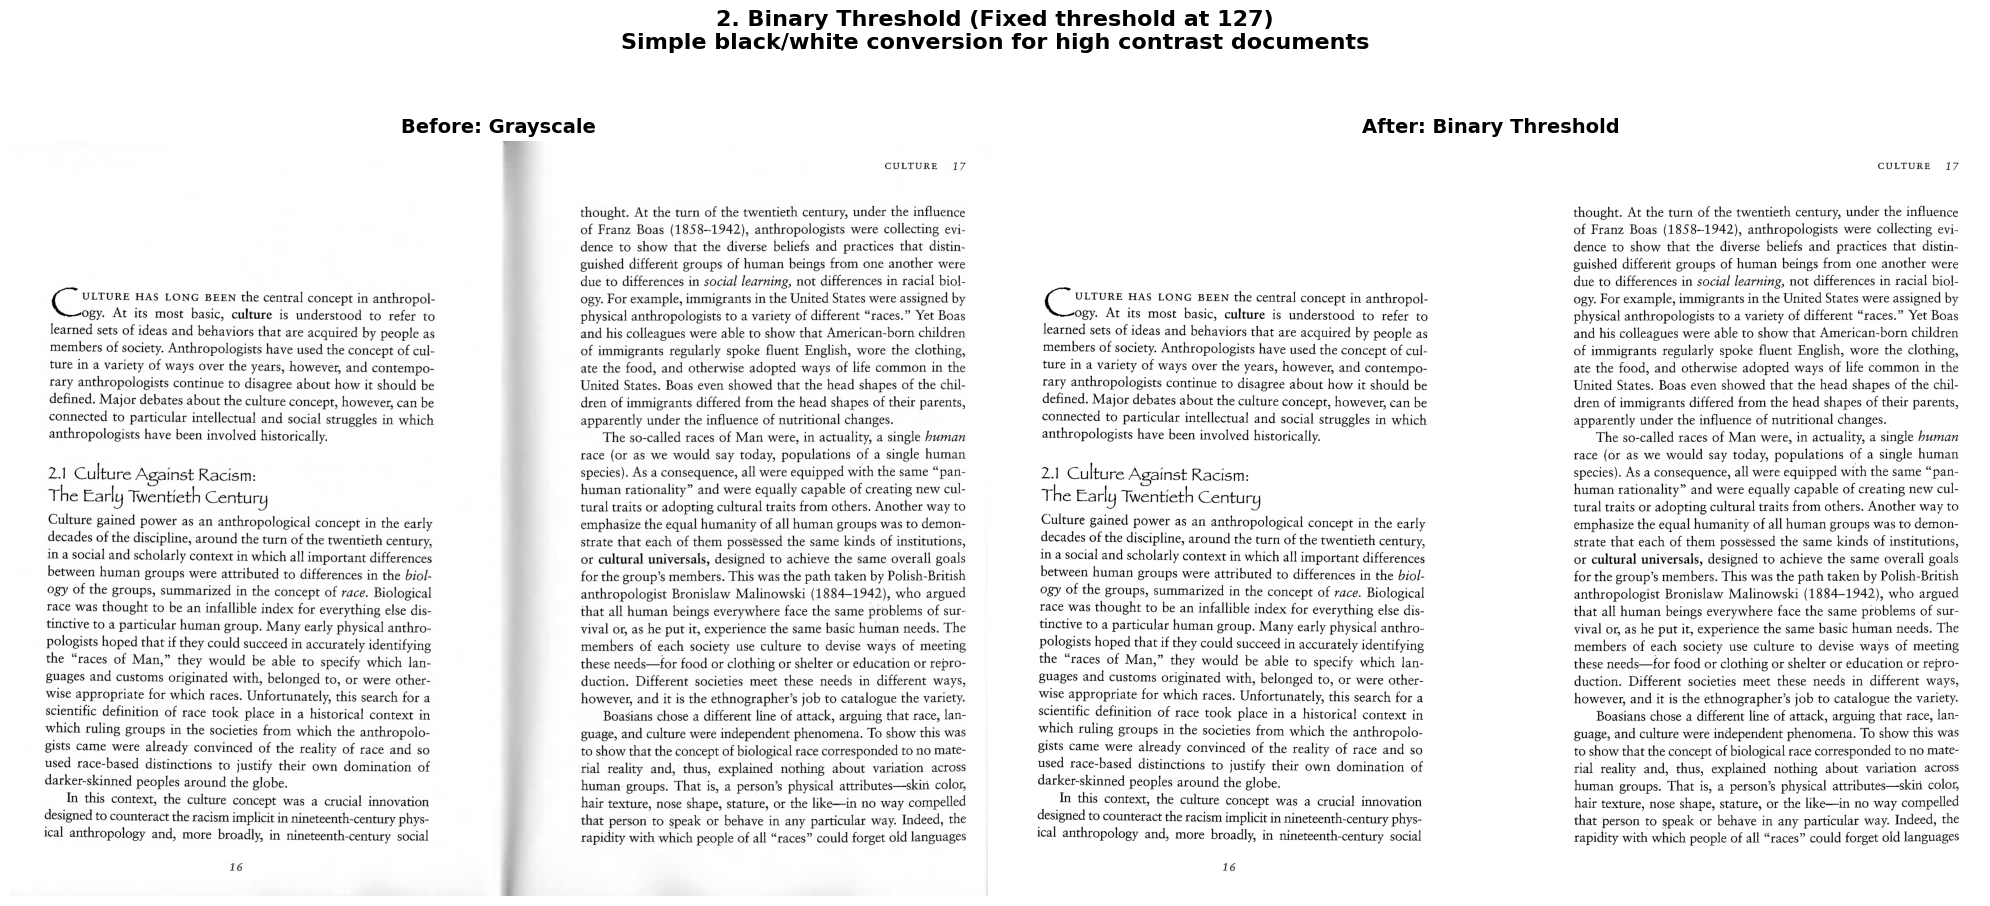

TECHNIQUE 2: BINARY THRESHOLD
Description: Pixels > 127 become white (255), others become black (0)
Use Case: Works well for high contrast documents
Limitation: Fixed threshold may not work for varying lighting



In [6]:
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.imshow(gray, cmap='gray')
ax1.set_title('Before: Grayscale', fontsize=14, fontweight='bold')
ax1.axis('off')

ax2.imshow(binary, cmap='gray')
ax2.set_title('After: Binary Threshold', fontsize=14, fontweight='bold')
ax2.axis('off')

plt.suptitle('2. Binary Threshold (Fixed threshold at 127)\nSimple black/white conversion for high contrast documents', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

print("="*80)
print("TECHNIQUE 2: BINARY THRESHOLD")
print("="*80)
print("Description: Pixels > 127 become white (255), others become black (0)")
print("Use Case: Works well for high contrast documents")
print("Limitation: Fixed threshold may not work for varying lighting")
print("="*80 + "\n")

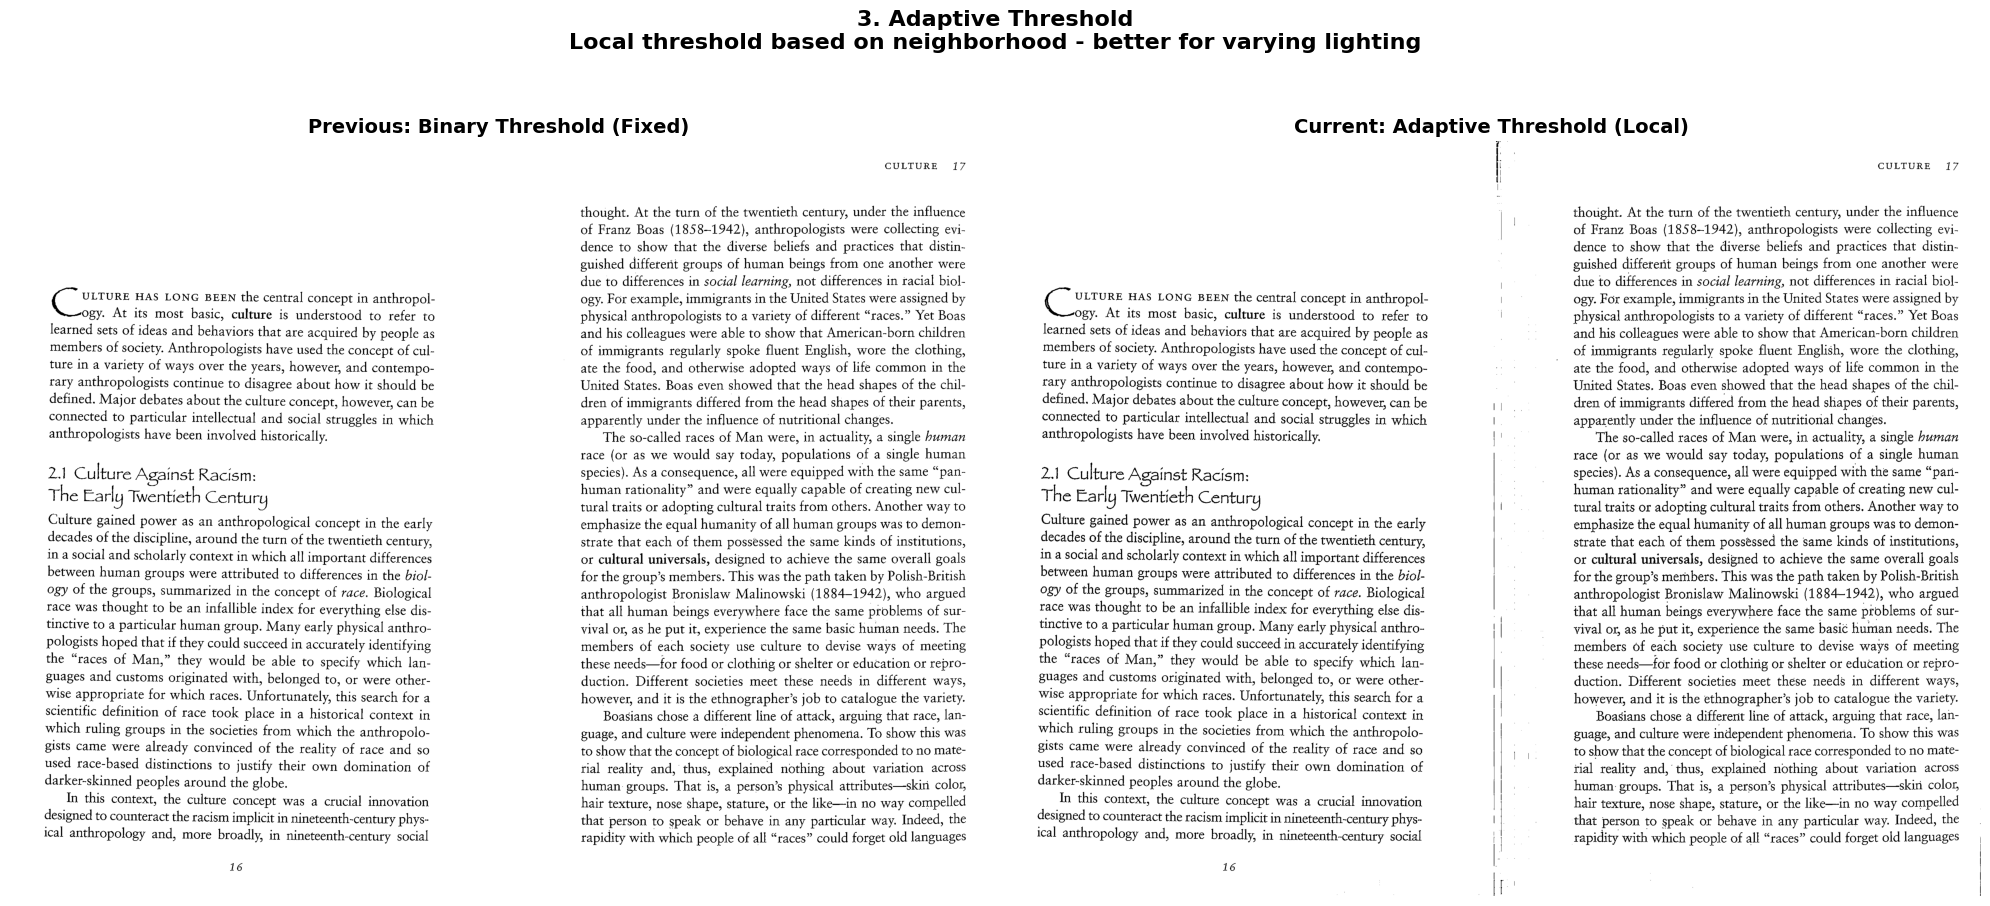

TECHNIQUE 3: ADAPTIVE THRESHOLD
Description: Threshold calculated for small regions of the image
Use Case: Documents with varying lighting or shadows
Benefits: More robust than fixed threshold
Parameters: Block size=11, constant=2



In [7]:
adaptive_thresh = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.imshow(binary, cmap='gray')
ax1.set_title('Previous: Binary Threshold (Fixed)', fontsize=14, fontweight='bold')
ax1.axis('off')

ax2.imshow(adaptive_thresh, cmap='gray')
ax2.set_title('Current: Adaptive Threshold (Local)', fontsize=14, fontweight='bold')
ax2.axis('off')

plt.suptitle('3. Adaptive Threshold\nLocal threshold based on neighborhood - better for varying lighting', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

print("="*80)
print("TECHNIQUE 3: ADAPTIVE THRESHOLD")
print("="*80)
print("Description: Threshold calculated for small regions of the image")
print("Use Case: Documents with varying lighting or shadows")
print("Benefits: More robust than fixed threshold")
print("Parameters: Block size=11, constant=2")
print("="*80 + "\n")

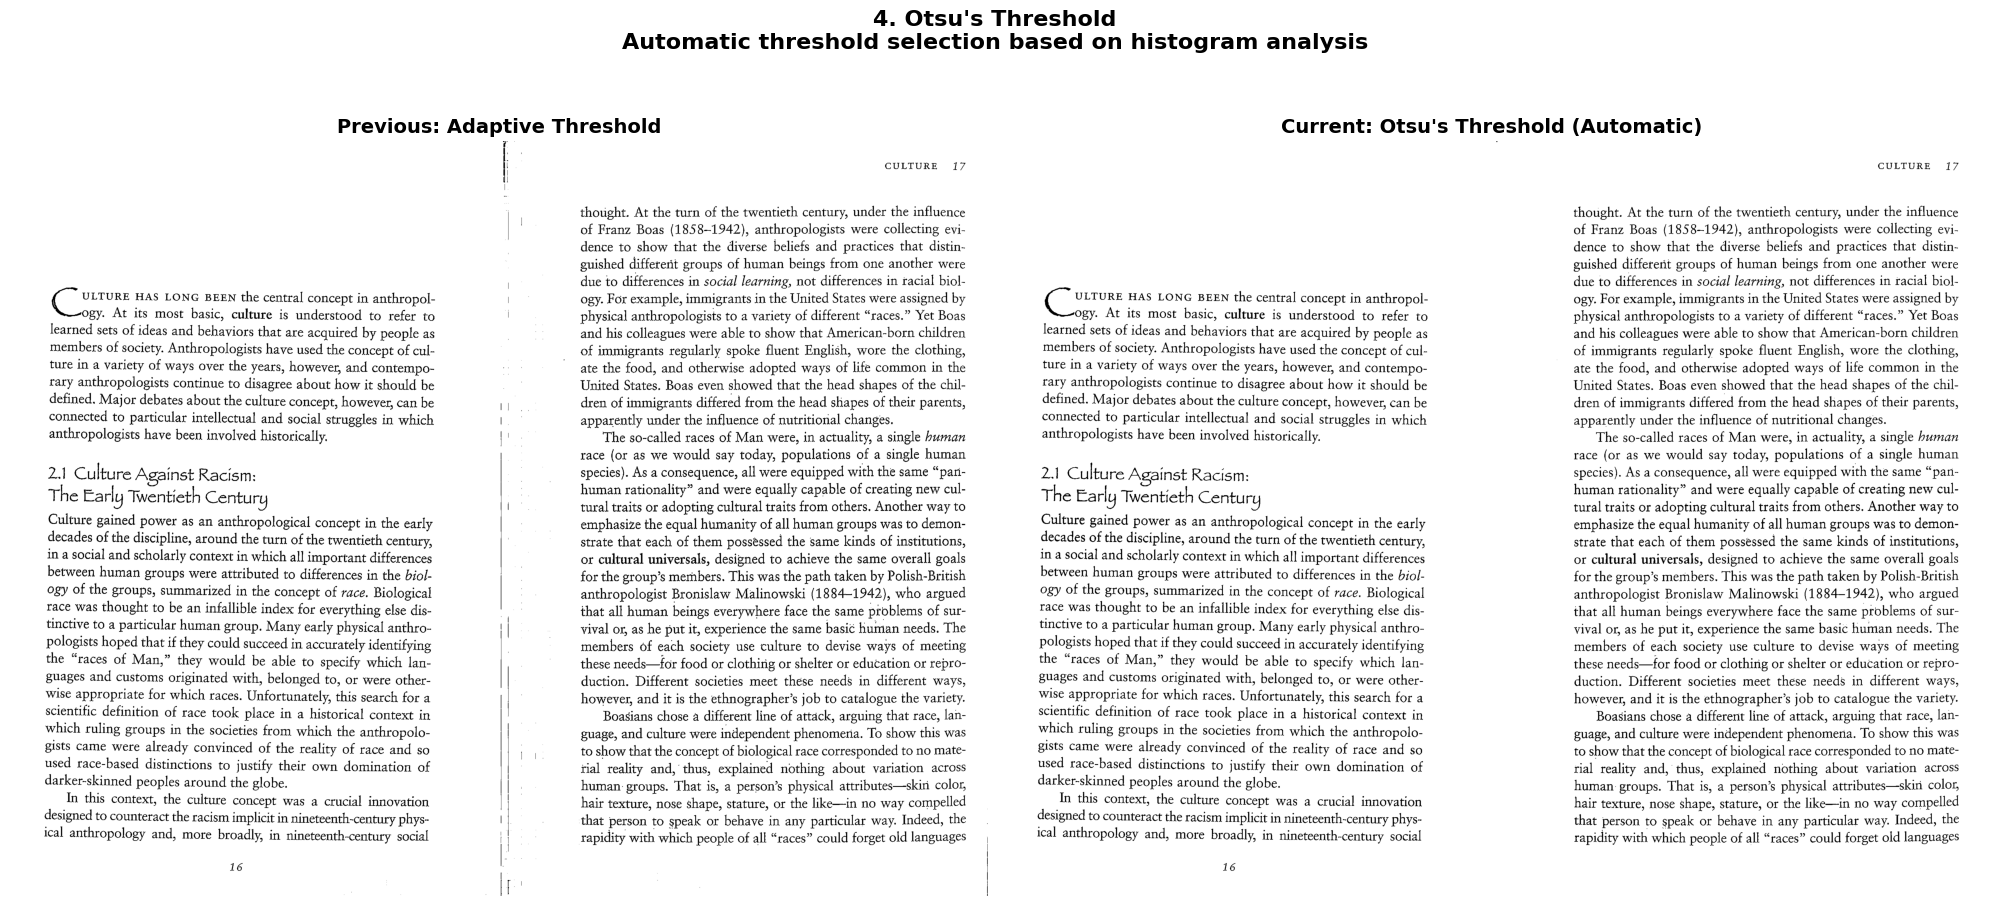

TECHNIQUE 4: OTSU'S THRESHOLD
Description: Automatically finds optimal threshold value
Use Case: Images with bimodal histograms (two distinct peaks)
Benefits: No manual threshold selection needed
How it works: Minimizes intra-class variance



In [8]:
_, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.imshow(adaptive_thresh, cmap='gray')
ax1.set_title('Previous: Adaptive Threshold', fontsize=14, fontweight='bold')
ax1.axis('off')

ax2.imshow(otsu, cmap='gray')
ax2.set_title("Current: Otsu's Threshold (Automatic)", fontsize=14, fontweight='bold')
ax2.axis('off')

plt.suptitle("4. Otsu's Threshold\nAutomatic threshold selection based on histogram analysis", 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

print("="*80)
print("TECHNIQUE 4: OTSU'S THRESHOLD")
print("="*80)
print("Description: Automatically finds optimal threshold value")
print("Use Case: Images with bimodal histograms (two distinct peaks)")
print("Benefits: No manual threshold selection needed")
print("How it works: Minimizes intra-class variance")
print("="*80 + "\n")

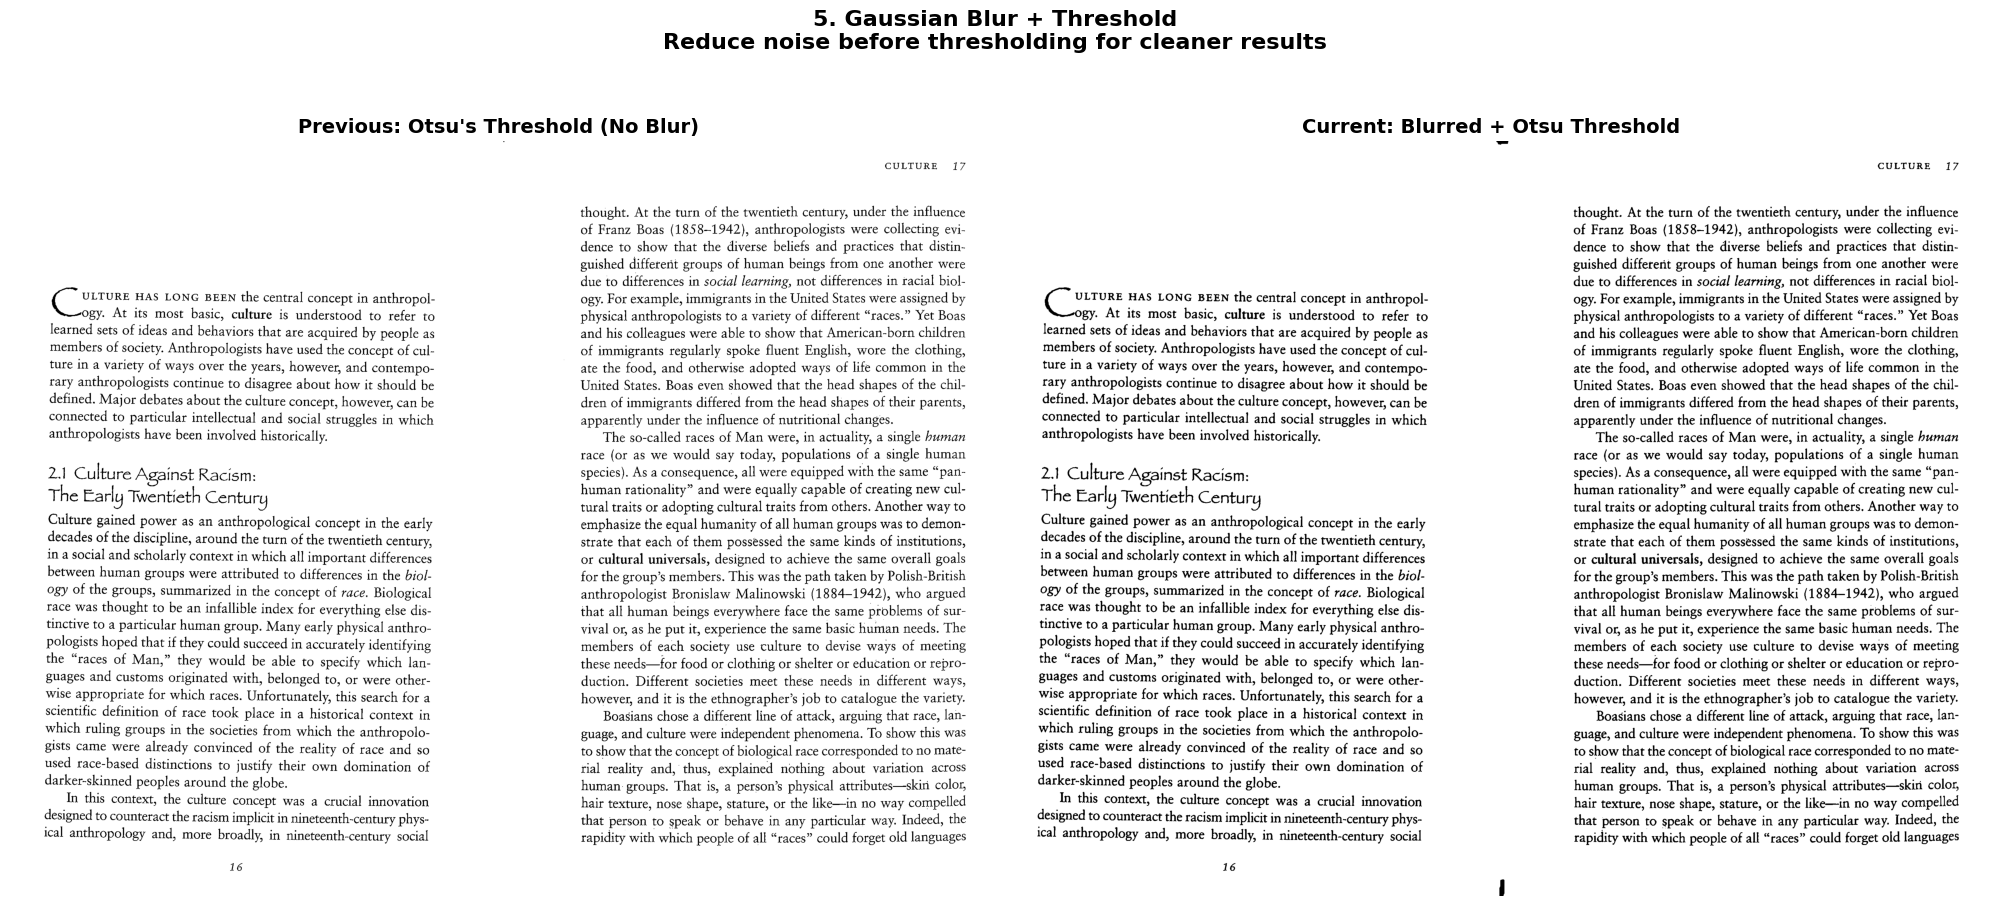

TECHNIQUE 5: BLURRED + THRESHOLD
Description: Apply Gaussian blur before Otsu thresholding
Use Case: Noisy images or scanned documents
Benefits: Reduces noise and small artifacts
Process: Blur (5x5 kernel) → Otsu threshold



In [9]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
_, blur_thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.imshow(otsu, cmap='gray')
ax1.set_title("Previous: Otsu's Threshold (No Blur)", fontsize=14, fontweight='bold')
ax1.axis('off')

ax2.imshow(blur_thresh, cmap='gray')
ax2.set_title('Current: Blurred + Otsu Threshold', fontsize=14, fontweight='bold')
ax2.axis('off')

plt.suptitle('5. Gaussian Blur + Threshold\nReduce noise before thresholding for cleaner results', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

print("="*80)
print("TECHNIQUE 5: BLURRED + THRESHOLD")
print("="*80)
print("Description: Apply Gaussian blur before Otsu thresholding")
print("Use Case: Noisy images or scanned documents")
print("Benefits: Reduces noise and small artifacts")
print("Process: Blur (5x5 kernel) → Otsu threshold")
print("="*80 + "\n")

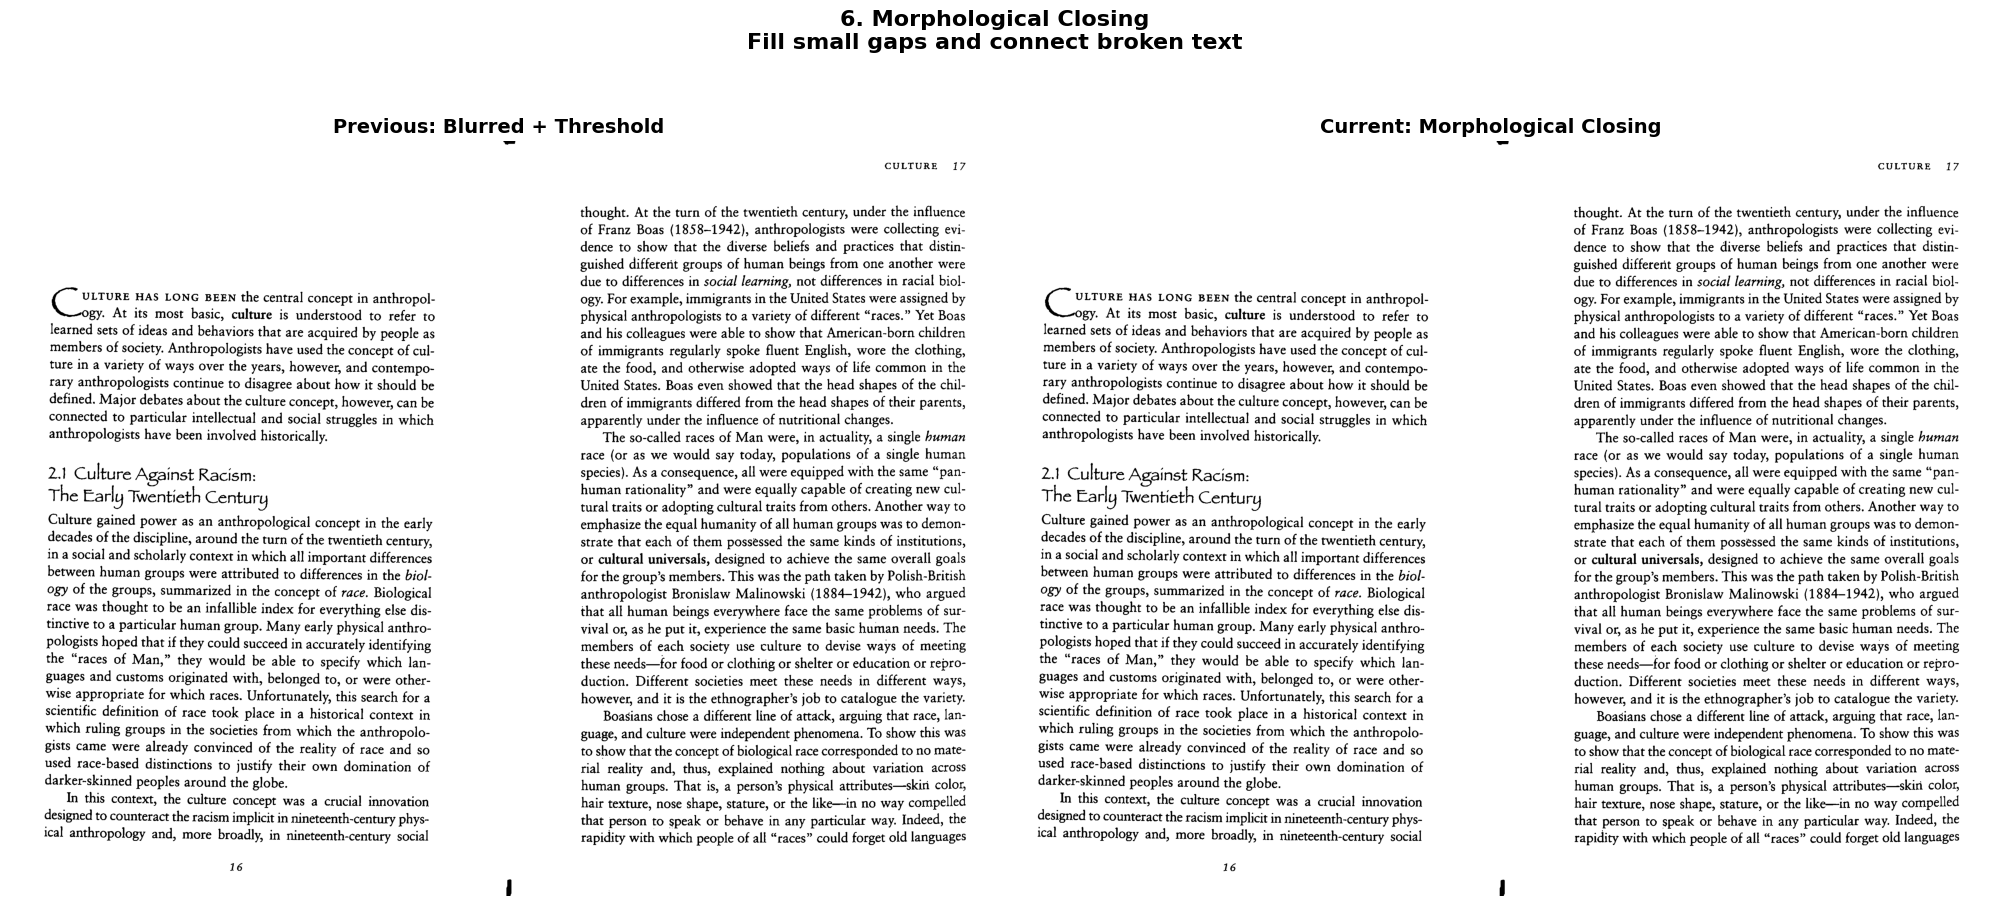

TECHNIQUE 6: MORPHOLOGICAL CLOSING
Description: Dilation followed by erosion
Use Case: Connect broken characters, fill small holes
Benefits: Improves text continuity
Kernel size: 2x2 pixels



In [10]:
kernel = np.ones((2, 2), np.uint8)
morph = cv2.morphologyEx(blur_thresh, cv2.MORPH_CLOSE, kernel)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.imshow(blur_thresh, cmap='gray')
ax1.set_title('Previous: Blurred + Threshold', fontsize=14, fontweight='bold')
ax1.axis('off')

ax2.imshow(morph, cmap='gray')
ax2.set_title('Current: Morphological Closing', fontsize=14, fontweight='bold')
ax2.axis('off')

plt.suptitle('6. Morphological Closing\nFill small gaps and connect broken text', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

print("="*80)
print("TECHNIQUE 6: MORPHOLOGICAL CLOSING")
print("="*80)
print("Description: Dilation followed by erosion")
print("Use Case: Connect broken characters, fill small holes")
print("Benefits: Improves text continuity")
print("Kernel size: 2x2 pixels")
print("="*80 + "\n")

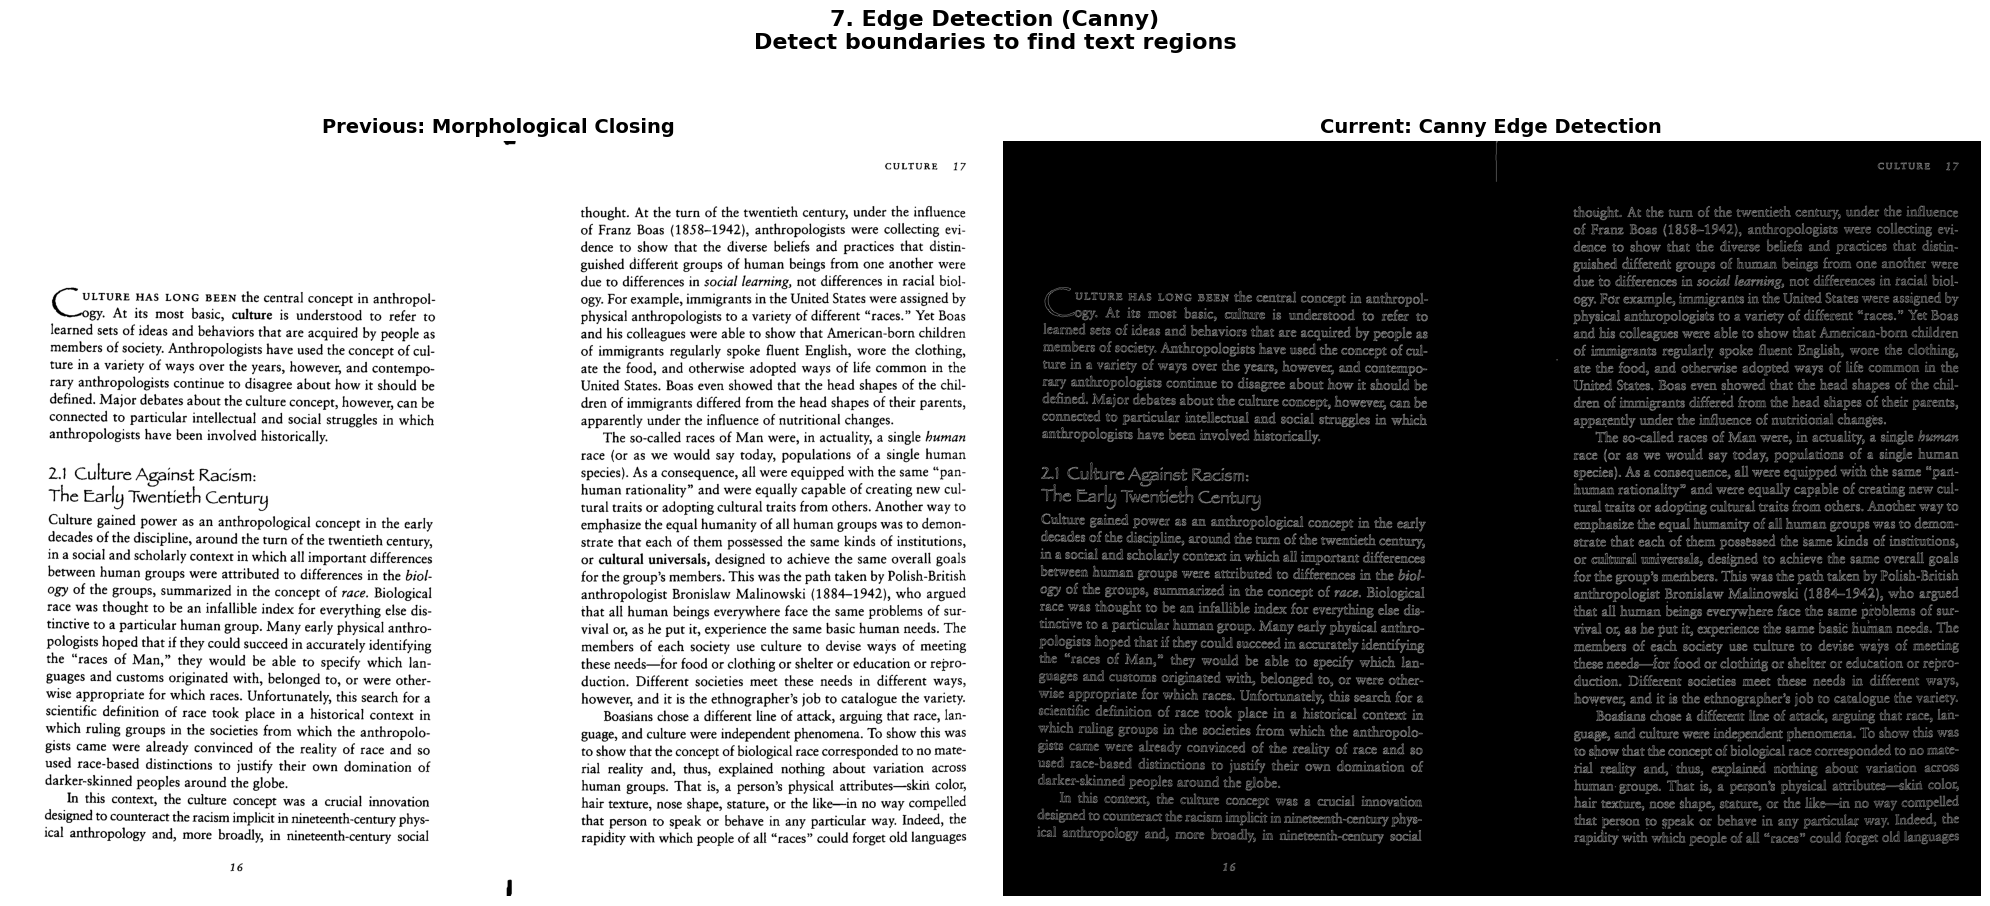

TECHNIQUE 7: EDGE DETECTION
Description: Canny edge detection algorithm
Use Case: Find text regions and boundaries
Parameters: Lower threshold=50, Upper threshold=150
Benefits: Highlights character outlines



In [16]:
edges = cv2.Canny(gray, 50, 150)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.imshow(morph, cmap='gray')
ax1.set_title('Previous: Morphological Closing', fontsize=14, fontweight='bold')
ax1.axis('off')

ax2.imshow(edges, cmap='gray')
ax2.set_title('Current: Canny Edge Detection', fontsize=14, fontweight='bold')
ax2.axis('off')

plt.suptitle('7. Edge Detection (Canny)\nDetect boundaries to find text regions', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

print("="*80)
print("TECHNIQUE 7: EDGE DETECTION")
print("="*80)
print("Description: Canny edge detection algorithm")
print("Use Case: Find text regions and boundaries")
print("Parameters: Lower threshold=50, Upper threshold=150")
print("Benefits: Highlights character outlines")
print("="*80 + "\n")

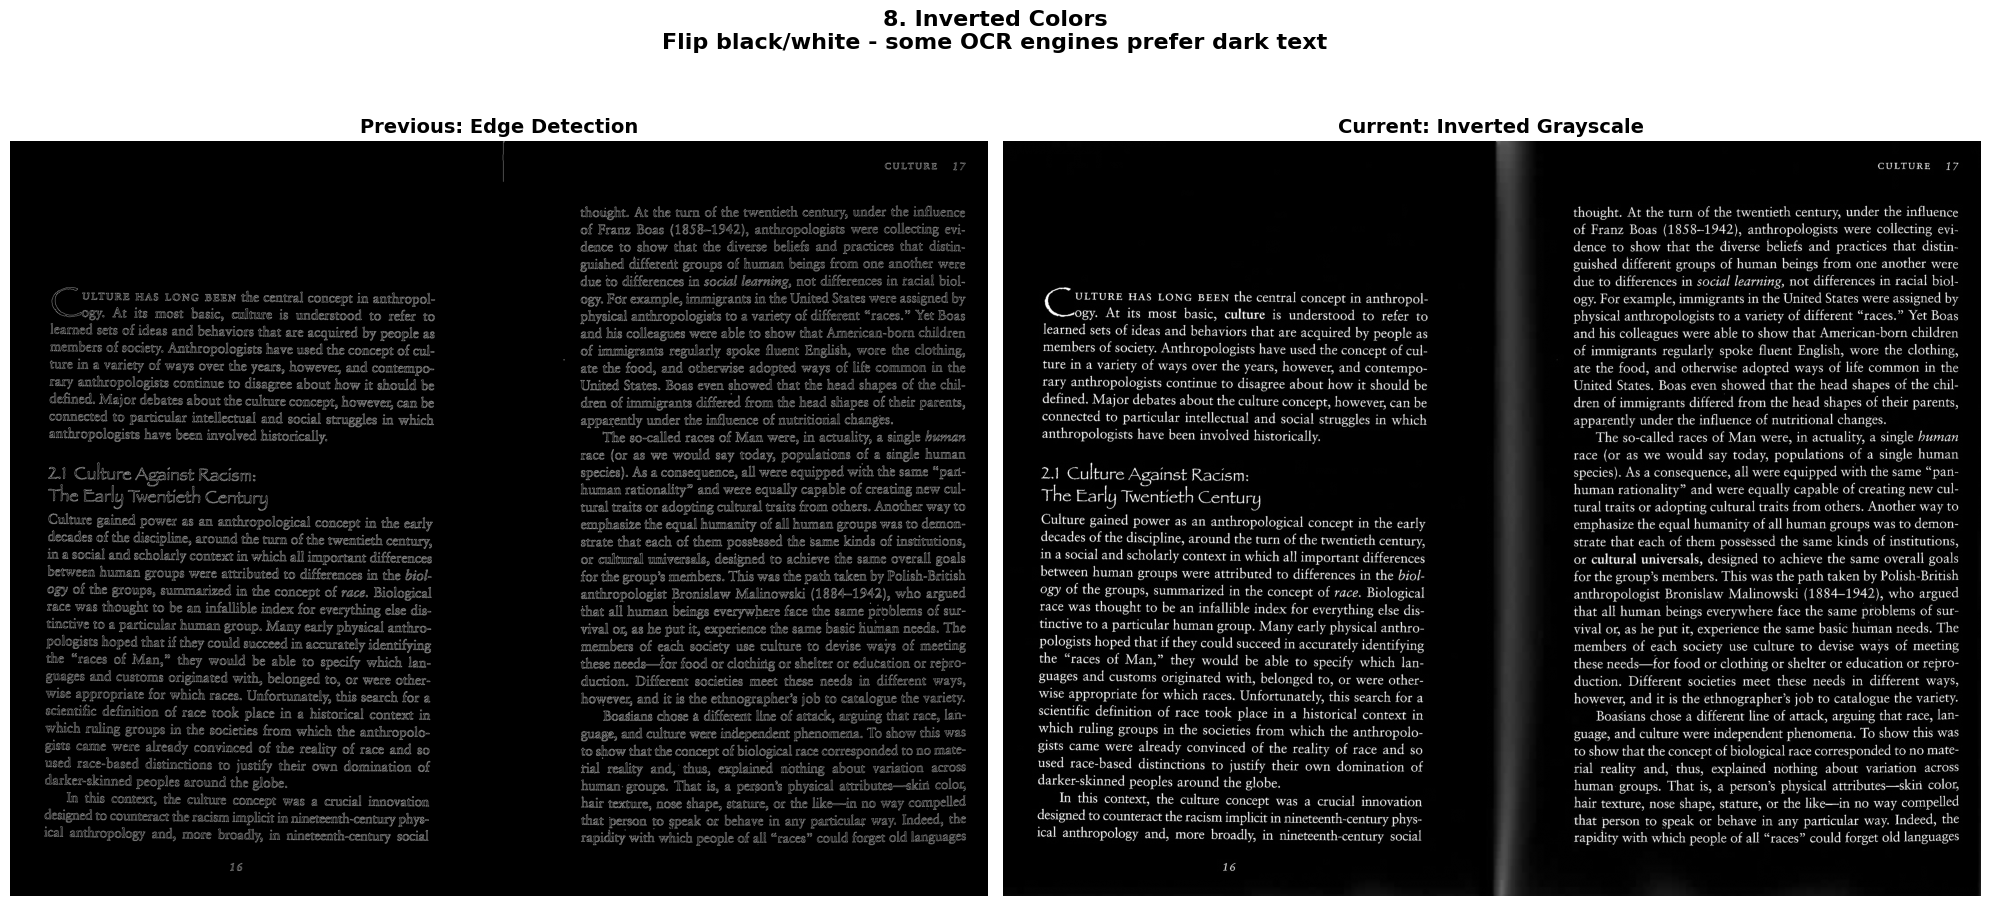

TECHNIQUE 8: INVERTED
Description: Flip all pixel values (255 - pixel_value)
Use Case: Some OCR engines work better with inverted images
Benefits: Can improve OCR accuracy in certain cases



In [17]:
inverted = cv2.bitwise_not(gray)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.imshow(edges, cmap='gray')
ax1.set_title('Previous: Edge Detection', fontsize=14, fontweight='bold')
ax1.axis('off')

ax2.imshow(inverted, cmap='gray')
ax2.set_title('Current: Inverted Grayscale', fontsize=14, fontweight='bold')
ax2.axis('off')

plt.suptitle('8. Inverted Colors\nFlip black/white - some OCR engines prefer dark text', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

print("="*80)
print("TECHNIQUE 8: INVERTED")
print("="*80)
print("Description: Flip all pixel values (255 - pixel_value)")
print("Use Case: Some OCR engines work better with inverted images")
print("Benefits: Can improve OCR accuracy in certain cases")
print("="*80 + "\n")

In [19]:
techniques = {
    'Grayscale': gray,
    'Binary Threshold': binary,
    'Adaptive Threshold': adaptive_thresh,
    'Otsu Threshold': otsu,
    'Blurred + Threshold': blur_thresh,
    'Morphological Closing': morph,
    'Edge Detection': edges,
    'Inverted': inverted
}

# Create summary DataFrame
technique_info = pd.DataFrame([
    {'Technique': 'Grayscale', 'Description': 'Convert to single channel', 'Use Case': 'Basic preprocessing'},
    {'Technique': 'Binary Threshold', 'Description': 'Simple black/white conversion', 'Use Case': 'High contrast documents'},
    {'Technique': 'Adaptive Threshold', 'Description': 'Local threshold based on neighborhood', 'Use Case': 'Varying lighting conditions'},
    {'Technique': 'Otsu Threshold', 'Description': 'Automatic threshold selection', 'Use Case': 'Bimodal histograms'},
    {'Technique': 'Blurred + Threshold', 'Description': 'Reduce noise before thresholding', 'Use Case': 'Noisy images'},
    {'Technique': 'Morphological Closing', 'Description': 'Fill small gaps', 'Use Case': 'Connect broken text'},
    {'Technique': 'Edge Detection', 'Description': 'Detect boundaries', 'Use Case': 'Find text regions'},
    {'Technique': 'Inverted', 'Description': 'Flip black/white', 'Use Case': 'Some OCR engines prefer dark text'}
])

print("\n" + "="*80)
print("SUMMARY: ALL IMAGE PROCESSING TECHNIQUES")
print("="*80)
display(technique_info)
print("="*80)



SUMMARY: ALL IMAGE PROCESSING TECHNIQUES


Technique                            Description  \
0              Grayscale              Convert to single channel   
1       Binary Threshold          Simple black/white conversion   
2     Adaptive Threshold  Local threshold based on neighborhood   
3         Otsu Threshold          Automatic threshold selection   
4    Blurred + Threshold       Reduce noise before thresholding   
5  Morphological Closing                        Fill small gaps   
6         Edge Detection                      Detect boundaries   
7               Inverted                       Flip black/white   

                            Use Case  
0                Basic preprocessing  
1            High contrast documents  
2        Varying lighting conditions  
3                 Bimodal histograms  
4                       Noisy images  
5                Connect broken text  
6                  Find text regions  
7  Some OCR engines prefer dark text

## Step 3: OCR with Bounding Boxes

Now let's extract text and draw bounding boxes around detected text regions:

In [11]:
# Use the grayscale image for OCR
# You can experiment with different processed versions
ocr_image = gray.copy()

# Get detailed OCR data including bounding boxes
# Level 5 = word level
ocr_data = pytesseract.image_to_data(ocr_image, output_type=pytesseract.Output.DICT)

# Create a pandas DataFrame from OCR results
df_ocr = pd.DataFrame(ocr_data)

# Filter out empty text
df_ocr = df_ocr[df_ocr['text'].str.strip() != '']
df_ocr = df_ocr[df_ocr['conf'] != -1]  # Remove invalid confidence scores

print(f"Total words detected: {len(df_ocr)}")
print(f"\nFirst 10 detected words:")
display(df_ocr[['text', 'conf', 'left', 'top', 'width', 'height']].head(10))

# Statistics
print(f"\nOCR Statistics:")
print(f"Average confidence: {df_ocr['conf'].mean():.2f}%")
print(f"Min confidence: {df_ocr['conf'].min():.2f}%")
print(f"Max confidence: {df_ocr['conf'].max():.2f}%")

Total words detected: 678

First 10 detected words:


text  conf  left  top  width  height
4       Citure     0   141  497    261      99
5          HAS    96   424  517     75      24
6         LONG    95   524  518    112      25
7         BEEN    96   658  520    104      24
8          the    96   780  509     59      36
9      central    96   856  512    132      35
10     concept    96  1006  523    150      36
11          in    93  1172  516     36      33
12  anthropol-    91  1226  515    207      46
14        ogy.    96   243  574     75      33


OCR Statistics:
Average confidence: 95.05%
Min confidence: 0.00%
Max confidence: 97.00%


## Step 4: Draw Bounding Boxes on Image

Let's visualize the detected text with bounding boxes:

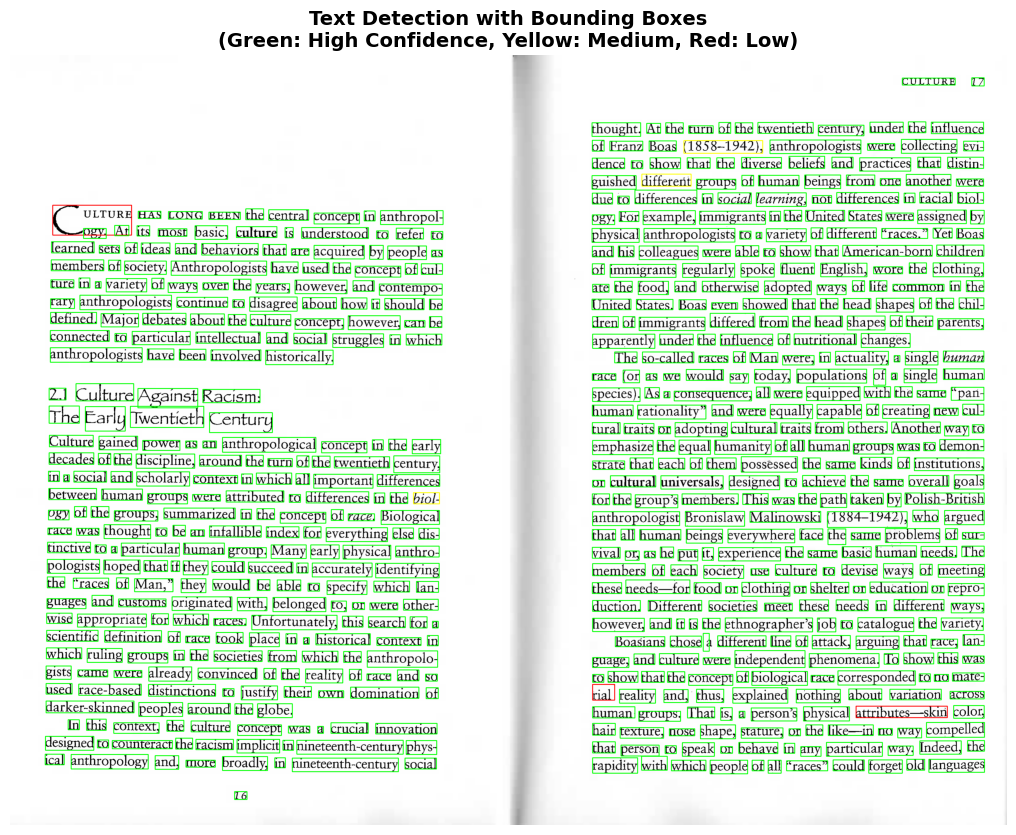


Color Legend:
🟢 Green: Confidence > 80%
🟡 Yellow: Confidence 60-80%
🔴 Red: Confidence < 60%


In [12]:
# Create a copy of the grayscale image for drawing
image_with_boxes = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

# Draw bounding boxes for each word
for idx, row in df_ocr.iterrows():
    x, y, w, h = row['left'], row['top'], row['width'], row['height']
    conf = row['conf']
    
    # Color based on confidence: green (high) to red (low)
    if conf > 80:
        color = (0, 255, 0)  # Green
    elif conf > 60:
        color = (0, 255, 255)  # Yellow
    else:
        color = (0, 0, 255)  # Red
    
    # Draw rectangle
    cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), color, 2)
    
    # Optionally add confidence score
    # cv2.putText(image_with_boxes, f"{conf:.0f}", (x, y-5), 
    #             cv2.FONT_HERSHEY_SIMPLEX, 0.3, color, 1)

# Display the result
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
plt.title("Text Detection with Bounding Boxes\n(Green: High Confidence, Yellow: Medium, Red: Low)", 
          fontsize=14, fontweight='bold')
plt.axis('off')
plt.show()

print("\nColor Legend:")
print("🟢 Green: Confidence > 80%")
print("🟡 Yellow: Confidence 60-80%")
print("🔴 Red: Confidence < 60%")

## Step 5: Line-Level Text Detection

Let's detect text at the line level instead of word level:

Total lines detected: 16

First 10 lines:


line_num                                               text       conf
0         1  Citure HAS LONG BEEN the central concept in an...  93.753623
1         2  ogy. At its most basic, culture is understood ...  95.200000
2         3  learned sets of ideas and behaviors that are a...  95.430769
3         4  members of society. Anthropologists have used ...  93.795918
4         5  ture in a variety of ways over the years, howe...  94.203704
5         6  rary anthropologists continue to disagree abou...  95.600000
6         7  defined. Major debates about the culture conce...  95.283019
7         8  connected to particular intellectual and socia...  95.580000
8         9  anthropologists have been involved historicall...  95.270270
9        10  guages and customs originated with, belonged t...  95.214286

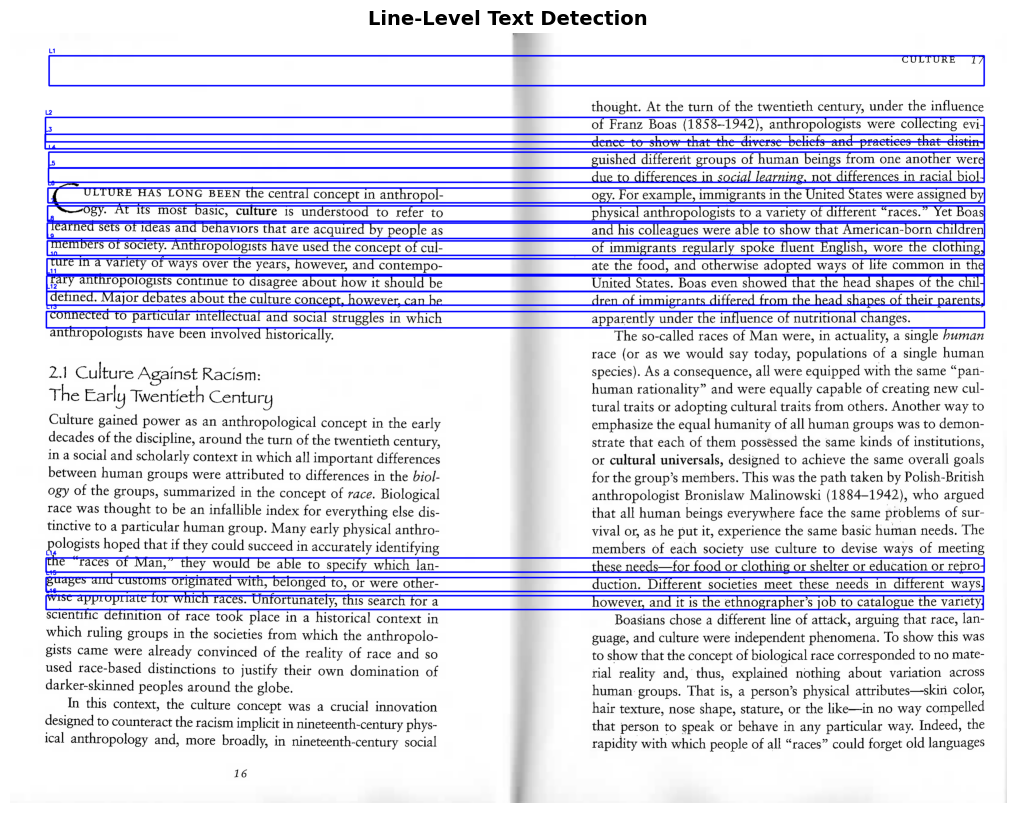

In [13]:
# Get line-level OCR data
# We'll group words by their line number
df_lines = df_ocr.groupby('line_num').agg({
    'text': lambda x: ' '.join(x),
    'left': 'min',
    'top': 'min',
    'width': lambda x: max(df_ocr.loc[x.index, 'left'] + df_ocr.loc[x.index, 'width']) - min(df_ocr.loc[x.index, 'left']),
    'height': 'max',
    'conf': 'mean'
}).reset_index()

print(f"Total lines detected: {len(df_lines)}")
print("\nFirst 10 lines:")
display(df_lines[['line_num', 'text', 'conf']].head(10))

# Create image with line-level bounding boxes
image_with_lines = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

for idx, row in df_lines.iterrows():
    x, y, w, h = int(row['left']), int(row['top']), int(row['width']), int(row['height'])
    
    # Draw thicker boxes for lines
    cv2.rectangle(image_with_lines, (x, y), (x + w, y + h), (255, 0, 0), 3)
    
    # Add line number
    cv2.putText(image_with_lines, f"L{row['line_num']}", (x, y-10), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

# Display
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB))
plt.title("Line-Level Text Detection", fontsize=14, fontweight='bold')
plt.axis('off')
plt.show()

## Step 6: Extract and Display Full Text

In [14]:
# Extract full text
full_text = pytesseract.image_to_string(ocr_image)

print("="*80)
print("EXTRACTED TEXT FROM IMAGE")
print("="*80)
print(full_text)
print("="*80)

EXTRACTED TEXT FROM IMAGE
Citure HAS LONG BEEN the central concept in anthropol-
ogy. At its most basic, culture is understood to refer to
learned sets of ideas and behaviors that are acquired by people as
members of society. Anthropologists have used the concept of cul-
ture in a variety of ways over the years, however, and contempo-
rary anthropologists continue to disagree about how it should be
defined. Major debates about the culture concept, however, can be
connected to particular intellectual and social struggles in which
anthropologists have been involved historically.

24 Culture Against Racism:
The Early Twentieth Century

Culture gained power as an anthropological concept in the early
decades of the discipline, around the turn of the twentieth century,
in a social and scholarly context in which all important differences
between human groups were attributed to differences in the biol-
ogy of the groups, summarized in the concept of race. Biological
race was thought to be an i

## Step 7: Advanced - Compare Different Processing Methods

Let's compare OCR accuracy across different image processing techniques:

In [15]:
# Test OCR on different processed images
comparison_results = []

for name, processed_img in techniques.items():
    # Run OCR
    data = pytesseract.image_to_data(processed_img, output_type=pytesseract.Output.DICT)
    df_temp = pd.DataFrame(data)
    df_temp = df_temp[df_temp['text'].str.strip() != '']
    df_temp = df_temp[df_temp['conf'] != -1]
    
    if len(df_temp) > 0:
        comparison_results.append({
            'Technique': name,
            'Words Detected': len(df_temp),
            'Avg Confidence': df_temp['conf'].mean(),
            'High Conf Words (>80%)': len(df_temp[df_temp['conf'] > 80]),
            'Low Conf Words (<60%)': len(df_temp[df_temp['conf'] < 60])
        })

df_comparison = pd.DataFrame(comparison_results)
df_comparison = df_comparison.sort_values('Avg Confidence', ascending=False)

print("\n" + "="*80)
print("OCR PERFORMANCE COMPARISON")
print("="*80)
display(df_comparison)

# Visualize comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Average confidence
ax1.barh(df_comparison['Technique'], df_comparison['Avg Confidence'], color='skyblue')
ax1.set_xlabel('Average Confidence (%)', fontsize=12)
ax1.set_title('OCR Confidence by Technique', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Words detected
ax2.barh(df_comparison['Technique'], df_comparison['Words Detected'], color='lightcoral')
ax2.set_xlabel('Number of Words Detected', fontsize=12)
ax2.set_title('Words Detected by Technique', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

NameError: name 'techniques' is not defined

## Step 8: Save Processed Images

In [ ]:
# Create output directory
output_dir = Path("../data/ocr_output")
output_dir.mkdir(exist_ok=True, parents=True)

# Save the images with bounding boxes
cv2.imwrite(str(output_dir / "word_level_boxes.png"), image_with_boxes)
cv2.imwrite(str(output_dir / "line_level_boxes.png"), image_with_lines)

# Save processed versions
for name, img in techniques.items():
    filename = name.lower().replace(' ', '_').replace('+', 'and') + '.png'
    cv2.imwrite(str(output_dir / filename), img)

# Save OCR data to CSV
df_ocr.to_csv(output_dir / "ocr_word_data.csv", index=False)
df_lines.to_csv(output_dir / "ocr_line_data.csv", index=False)
df_comparison.to_csv(output_dir / "technique_comparison.csv", index=False)

print(f"✅ All outputs saved to: {output_dir}")
print(f"\nSaved files:")
for file in sorted(output_dir.glob('*')):
    print(f"  - {file.name}")

## Summary

This notebook demonstrated:

1. **PDF to Image Conversion**: Using `pdf2image` to convert PDF pages into images
2. **Image Processing Techniques**: 8 different methods to preprocess images for better OCR
3. **OCR with Tesseract**: Extracting text with confidence scores and bounding boxes
4. **Pandas Integration**: Organizing OCR results in DataFrames for easy analysis
5. **Visualization**: Drawing bounding boxes at word and line levels
6. **Performance Comparison**: Evaluating which image processing technique works best

### Key Takeaways:
- Grayscale conversion is usually the first step for OCR
- Adaptive thresholding works well for documents with varying lighting
- Bounding boxes help visualize where text is detected
- Confidence scores indicate OCR reliability
- Different preprocessing techniques can significantly affect OCR accuracy